# **BACS2003 Artificial Intelligence**

## Group Members


| Name | Student ID |
| --- | --- |
| LAU AIK HUNG | 23WMR14555 |
| KESHANDRA A/L JAYASELAN | HJHG |
| LEONG CHUN XIANG | FDGHDFF |


## Dataset

In [2]:
!pip install datasets

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [50]:
import pandas as pd

from IPython.display import display

# Load the Amazon products dataset
df = pd.read_csv('music_users.csv') 

# Display as a clean table 
display(df)

,UserID,Gender,Age,FavoriteMusicType,WeeklyListeningHours,PaidSubscription,ListeningPlatform,Country,SubscriptionType,GenrePreferenceLevel,DeviceType,ListeningTimeOfDay,NumberOfPlaylists
0,1,Male,24,K-Pop,6,Yes,Apple Music,China,Premium,Low,Tablet,Evening,65
1,2,Female,37,Jazz,9,No,Apple Music,France,Premium,Low,Mobile,Morning,10
2,3,Male,32,Traditional,28,Yes,Amazon Music,France,Free,High,Mobile,Evening,19
3,4,Female,28,Pop,26,No,YouTube Music,Germany,Premium,Low,Tablet,Evening,92
4,5,Female,25,Oldies,18,Yes,YouTube Music,Australia,Free,High,Tablet,Evening,59
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,Male,19,EDM,6,Yes,NetEase Cloud,China,Student,High,PC,Afternoon,95
9996,9997,Female,24,K-Pop,12,Yes,YouTube Music,USA,Family,Medium,Tablet,Afternoon,100
9997,9998,Male,26,K-Pop,18,Yes,Spotify,Australia,Free,Medium,PC,Morning,55
9998,9999,Male,27,Pop,26,Yes,Apple Music,Australia,Premium,Low,Mobile,Morning,100


## Data Analysis

### Data Transformation, Data Preparation

In [51]:
# Check the column names
print(df.columns)

# Strip any leading/trailing spaces from column names
df.columns = df.columns.str.strip()

Index(['UserID', 'Gender', 'Age', 'FavoriteMusicType', 'WeeklyListeningHours',
       'PaidSubscription', 'ListeningPlatform', 'Country', 'SubscriptionType',
       'GenrePreferenceLevel', 'DeviceType', 'ListeningTimeOfDay',
       'NumberOfPlaylists'],
      dtype='object')


In [52]:
# Check missing values
print(df.isnull().sum())

UserID                  0
Gender                  0
Age                     0
FavoriteMusicType       0
WeeklyListeningHours    0
PaidSubscription        0
ListeningPlatform       0
Country                 0
SubscriptionType        0
GenrePreferenceLevel    0
DeviceType              0
ListeningTimeOfDay      0
NumberOfPlaylists       0
dtype: int64


In [53]:
# check if the datatypes for the data needs to do tranform or not 
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   UserID                10000 non-null  int64 
 1   Gender                10000 non-null  object
 2   Age                   10000 non-null  int64 
 3   FavoriteMusicType     10000 non-null  object
 4   WeeklyListeningHours  10000 non-null  int64 
 5   PaidSubscription      10000 non-null  object
 6   ListeningPlatform     10000 non-null  object
 7   Country               10000 non-null  object
 8   SubscriptionType      10000 non-null  object
 9   GenrePreferenceLevel  10000 non-null  object
 10  DeviceType            10000 non-null  object
 11  ListeningTimeOfDay    10000 non-null  object
 12  NumberOfPlaylists     10000 non-null  int64 
dtypes: int64(4), object(9)
memory usage: 1015.8+ KB
None


#### Change Gender to 1: Male 2: Female

In [54]:
df['Gender'] = df['Gender'].map({'Male': 1, 'Female': 2})

df

,UserID,Gender,Age,FavoriteMusicType,WeeklyListeningHours,PaidSubscription,ListeningPlatform,Country,SubscriptionType,GenrePreferenceLevel,DeviceType,ListeningTimeOfDay,NumberOfPlaylists
0,1,1,24,K-Pop,6,Yes,Apple Music,China,Premium,Low,Tablet,Evening,65
1,2,2,37,Jazz,9,No,Apple Music,France,Premium,Low,Mobile,Morning,10
2,3,1,32,Traditional,28,Yes,Amazon Music,France,Free,High,Mobile,Evening,19
3,4,2,28,Pop,26,No,YouTube Music,Germany,Premium,Low,Tablet,Evening,92
4,5,2,25,Oldies,18,Yes,YouTube Music,Australia,Free,High,Tablet,Evening,59
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,1,19,EDM,6,Yes,NetEase Cloud,China,Student,High,PC,Afternoon,95
9996,9997,2,24,K-Pop,12,Yes,YouTube Music,USA,Family,Medium,Tablet,Afternoon,100
9997,9998,1,26,K-Pop,18,Yes,Spotify,Australia,Free,Medium,PC,Morning,55
9998,9999,1,27,Pop,26,Yes,Apple Music,Australia,Premium,Low,Mobile,Morning,100


#### Replace music genres with corresponding numeric values

In [55]:
# Replace music genres with corresponding numeric values
df['FavoriteMusicType'] = df['FavoriteMusicType'].replace({
    'Rock': 1,
    'Pop': 2,
    'J-Pop': 3,
    'K-Pop': 4,
    'EDM': 5,
    'Jazz': 6,
    'Chill': 7,
    'Oldies': 8,
    'Traditional': 9
})

df

C:\Users\Axinzen Lau\AppData\Local\Temp\ipykernel_6488\1985122484.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['FavoriteMusicType'] = df['FavoriteMusicType'].replace({


,UserID,Gender,Age,FavoriteMusicType,WeeklyListeningHours,PaidSubscription,ListeningPlatform,Country,SubscriptionType,GenrePreferenceLevel,DeviceType,ListeningTimeOfDay,NumberOfPlaylists
0,1,1,24,4,6,Yes,Apple Music,China,Premium,Low,Tablet,Evening,65
1,2,2,37,6,9,No,Apple Music,France,Premium,Low,Mobile,Morning,10
2,3,1,32,9,28,Yes,Amazon Music,France,Free,High,Mobile,Evening,19
3,4,2,28,2,26,No,YouTube Music,Germany,Premium,Low,Tablet,Evening,92
4,5,2,25,8,18,Yes,YouTube Music,Australia,Free,High,Tablet,Evening,59
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,1,19,5,6,Yes,NetEase Cloud,China,Student,High,PC,Afternoon,95
9996,9997,2,24,4,12,Yes,YouTube Music,USA,Family,Medium,Tablet,Afternoon,100
9997,9998,1,26,4,18,Yes,Spotify,Australia,Free,Medium,PC,Morning,55
9998,9999,1,27,2,26,Yes,Apple Music,Australia,Premium,Low,Mobile,Morning,100


#### Change PaidSubscription to 1:Yes 2:No

In [56]:
# Replace PaidSubscription values: 'Yes' -> 1, 'No' -> 2
df['PaidSubscription'] = df['PaidSubscription'].replace({'Yes': 1, 'No': 2})

df

C:\Users\Axinzen Lau\AppData\Local\Temp\ipykernel_6488\1531532316.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['PaidSubscription'] = df['PaidSubscription'].replace({'Yes': 1, 'No': 2})


,UserID,Gender,Age,FavoriteMusicType,WeeklyListeningHours,PaidSubscription,ListeningPlatform,Country,SubscriptionType,GenrePreferenceLevel,DeviceType,ListeningTimeOfDay,NumberOfPlaylists
0,1,1,24,4,6,1,Apple Music,China,Premium,Low,Tablet,Evening,65
1,2,2,37,6,9,2,Apple Music,France,Premium,Low,Mobile,Morning,10
2,3,1,32,9,28,1,Amazon Music,France,Free,High,Mobile,Evening,19
3,4,2,28,2,26,2,YouTube Music,Germany,Premium,Low,Tablet,Evening,92
4,5,2,25,8,18,1,YouTube Music,Australia,Free,High,Tablet,Evening,59
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,1,19,5,6,1,NetEase Cloud,China,Student,High,PC,Afternoon,95
9996,9997,2,24,4,12,1,YouTube Music,USA,Family,Medium,Tablet,Afternoon,100
9997,9998,1,26,4,18,1,Spotify,Australia,Free,Medium,PC,Morning,55
9998,9999,1,27,2,26,1,Apple Music,Australia,Premium,Low,Mobile,Morning,100


#### Replace ListeningPlatform values with numeric values

In [71]:
# Replace ListeningPlatform values with numeric values
df['ListeningPlatform'] = df['ListeningPlatform'].replace({
    'Spotify': 1,
    'Apple Music': 2,
    'QQ Music': 3,
    'NetEase Cloud': 4,
    'YouTube Music': 5,
    'Amazon Music': 6
})

df

C:\Users\Axinzen Lau\AppData\Local\Temp\ipykernel_6488\1675106517.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['ListeningPlatform'] = df['ListeningPlatform'].replace({


,UserID,Gender,Age,FavoriteMusicType,WeeklyListeningHours,PaidSubscription,ListeningPlatform,Country,SubscriptionType,GenrePreferenceLevel,DeviceType,ListeningTimeOfDay,NumberOfPlaylists
0,1,1,24,4,6,1,2,1,2,3,3,3,65
1,2,2,37,6,9,2,2,7,2,3,1,1,10
2,3,1,32,9,28,1,6,7,1,1,1,3,19
3,4,2,28,2,26,2,5,6,2,3,3,3,92
4,5,2,25,8,18,1,5,10,1,1,3,3,59
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,1,19,5,6,1,4,1,4,1,2,2,95
9996,9997,2,24,4,12,1,5,2,3,2,3,2,100
9997,9998,1,26,4,18,1,1,10,1,2,2,1,55
9998,9999,1,27,2,26,1,2,10,2,3,1,1,100


#### Replace Country values with numeric values

In [72]:
# Replace Country values with numeric values
df['Country'] = df['Country'].replace({
    'China': 1,
    'USA': 2,
    'Japan': 3,
    'Korea': 4,
    'UK': 5,
    'Germany': 6,
    'France': 7,
    'Brazil': 8,
    'India': 9,
    'Australia': 10
})

df

,UserID,Gender,Age,FavoriteMusicType,WeeklyListeningHours,PaidSubscription,ListeningPlatform,Country,SubscriptionType,GenrePreferenceLevel,DeviceType,ListeningTimeOfDay,NumberOfPlaylists
0,1,1,24,4,6,1,2,1,2,3,3,3,65
1,2,2,37,6,9,2,2,7,2,3,1,1,10
2,3,1,32,9,28,1,6,7,1,1,1,3,19
3,4,2,28,2,26,2,5,6,2,3,3,3,92
4,5,2,25,8,18,1,5,10,1,1,3,3,59
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,1,19,5,6,1,4,1,4,1,2,2,95
9996,9997,2,24,4,12,1,5,2,3,2,3,2,100
9997,9998,1,26,4,18,1,1,10,1,2,2,1,55
9998,9999,1,27,2,26,1,2,10,2,3,1,1,100


#### Replace SubscriptionType values with numeric values

In [73]:
# Replace SubscriptionType values with numeric values
df['SubscriptionType'] = df['SubscriptionType'].replace({
    'Free': 1,
    'Premium': 2,
    'Family': 3,
    'Student': 4
})

df

,UserID,Gender,Age,FavoriteMusicType,WeeklyListeningHours,PaidSubscription,ListeningPlatform,Country,SubscriptionType,GenrePreferenceLevel,DeviceType,ListeningTimeOfDay,NumberOfPlaylists
0,1,1,24,4,6,1,2,1,2,3,3,3,65
1,2,2,37,6,9,2,2,7,2,3,1,1,10
2,3,1,32,9,28,1,6,7,1,1,1,3,19
3,4,2,28,2,26,2,5,6,2,3,3,3,92
4,5,2,25,8,18,1,5,10,1,1,3,3,59
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,1,19,5,6,1,4,1,4,1,2,2,95
9996,9997,2,24,4,12,1,5,2,3,2,3,2,100
9997,9998,1,26,4,18,1,1,10,1,2,2,1,55
9998,9999,1,27,2,26,1,2,10,2,3,1,1,100


#### Replace GenrePreferenceLevel values with numeric values

In [74]:
# Replace GenrePreferenceLevel values with numeric values
df['GenrePreferenceLevel'] = df['GenrePreferenceLevel'].replace({
    'High': 1,
    'Medium': 2,
    'Low': 3
})

df

,UserID,Gender,Age,FavoriteMusicType,WeeklyListeningHours,PaidSubscription,ListeningPlatform,Country,SubscriptionType,GenrePreferenceLevel,DeviceType,ListeningTimeOfDay,NumberOfPlaylists
0,1,1,24,4,6,1,2,1,2,3,3,3,65
1,2,2,37,6,9,2,2,7,2,3,1,1,10
2,3,1,32,9,28,1,6,7,1,1,1,3,19
3,4,2,28,2,26,2,5,6,2,3,3,3,92
4,5,2,25,8,18,1,5,10,1,1,3,3,59
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,1,19,5,6,1,4,1,4,1,2,2,95
9996,9997,2,24,4,12,1,5,2,3,2,3,2,100
9997,9998,1,26,4,18,1,1,10,1,2,2,1,55
9998,9999,1,27,2,26,1,2,10,2,3,1,1,100


#### Replace DeviceType values with numeric values

In [75]:
# Replace DeviceType values with numeric values
df['DeviceType'] = df['DeviceType'].replace({
    'Mobile': 1,
    'PC': 2,
    'Tablet': 3,
    'Smart Speaker': 4
})

df

,UserID,Gender,Age,FavoriteMusicType,WeeklyListeningHours,PaidSubscription,ListeningPlatform,Country,SubscriptionType,GenrePreferenceLevel,DeviceType,ListeningTimeOfDay,NumberOfPlaylists
0,1,1,24,4,6,1,2,1,2,3,3,3,65
1,2,2,37,6,9,2,2,7,2,3,1,1,10
2,3,1,32,9,28,1,6,7,1,1,1,3,19
3,4,2,28,2,26,2,5,6,2,3,3,3,92
4,5,2,25,8,18,1,5,10,1,1,3,3,59
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,1,19,5,6,1,4,1,4,1,2,2,95
9996,9997,2,24,4,12,1,5,2,3,2,3,2,100
9997,9998,1,26,4,18,1,1,10,1,2,2,1,55
9998,9999,1,27,2,26,1,2,10,2,3,1,1,100


#### Replace ListeningTimeOfDay values with numeric values

In [76]:
# Replace ListeningTimeOfDay values with numeric values
df['ListeningTimeOfDay'] = df['ListeningTimeOfDay'].replace({
    'Morning': 1,
    'Afternoon': 2,
    'Evening': 3,
    'Night': 4
})

df

,UserID,Gender,Age,FavoriteMusicType,WeeklyListeningHours,PaidSubscription,ListeningPlatform,Country,SubscriptionType,GenrePreferenceLevel,DeviceType,ListeningTimeOfDay,NumberOfPlaylists
0,1,1,24,4,6,1,2,1,2,3,3,3,65
1,2,2,37,6,9,2,2,7,2,3,1,1,10
2,3,1,32,9,28,1,6,7,1,1,1,3,19
3,4,2,28,2,26,2,5,6,2,3,3,3,92
4,5,2,25,8,18,1,5,10,1,1,3,3,59
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,1,19,5,6,1,4,1,4,1,2,2,95
9996,9997,2,24,4,12,1,5,2,3,2,3,2,100
9997,9998,1,26,4,18,1,1,10,1,2,2,1,55
9998,9999,1,27,2,26,1,2,10,2,3,1,1,100


In [77]:
# check if the datatypes for the data needs to do tranform or not 
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   UserID                10000 non-null  int64
 1   Gender                10000 non-null  int64
 2   Age                   10000 non-null  int64
 3   FavoriteMusicType     10000 non-null  int64
 4   WeeklyListeningHours  10000 non-null  int64
 5   PaidSubscription      10000 non-null  int64
 6   ListeningPlatform     10000 non-null  int64
 7   Country               10000 non-null  int64
 8   SubscriptionType      10000 non-null  int64
 9   GenrePreferenceLevel  10000 non-null  int64
 10  DeviceType            10000 non-null  int64
 11  ListeningTimeOfDay    10000 non-null  int64
 12  NumberOfPlaylists     10000 non-null  int64
dtypes: int64(13)
memory usage: 1015.8 KB
None


In [78]:
df.shape

(10000, 13)

In [79]:
df.columns

Index(['UserID', 'Gender', 'Age', 'FavoriteMusicType', 'WeeklyListeningHours',
       'PaidSubscription', 'ListeningPlatform', 'Country', 'SubscriptionType',
       'GenrePreferenceLevel', 'DeviceType', 'ListeningTimeOfDay',
       'NumberOfPlaylists'],
      dtype='object')

## Data Visualization

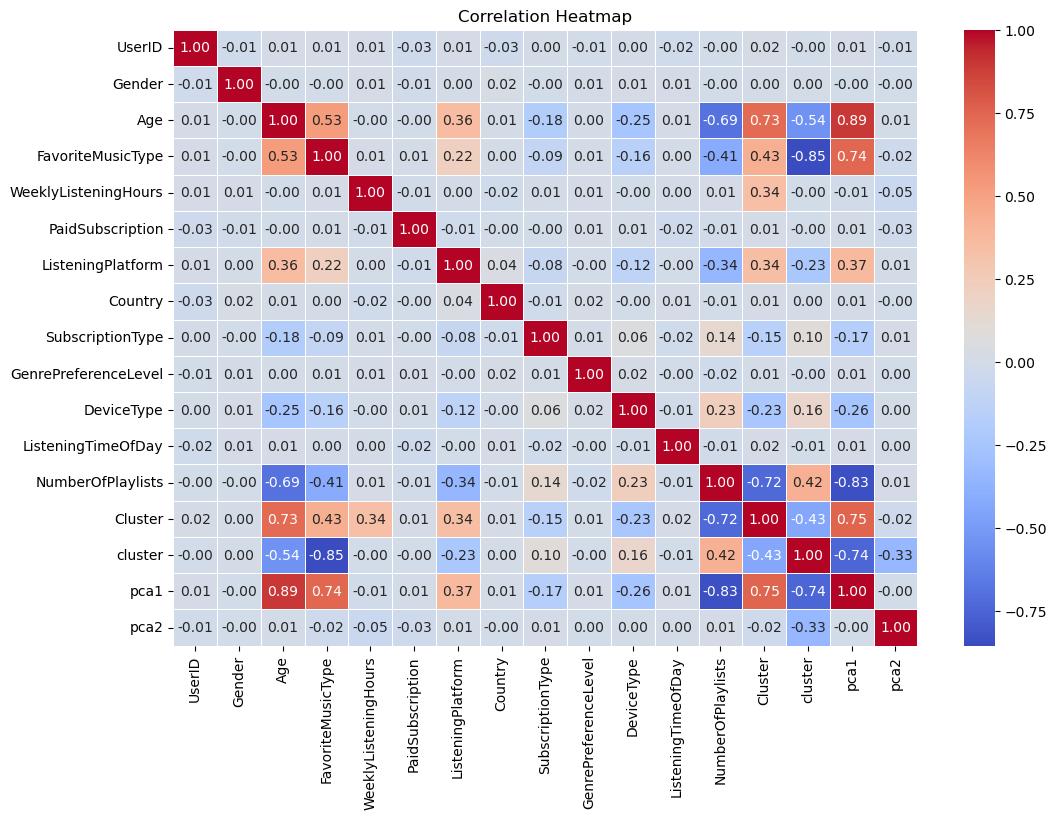

In [120]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate correlation matrix
corr_matrix = df.corr()

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

## K-means

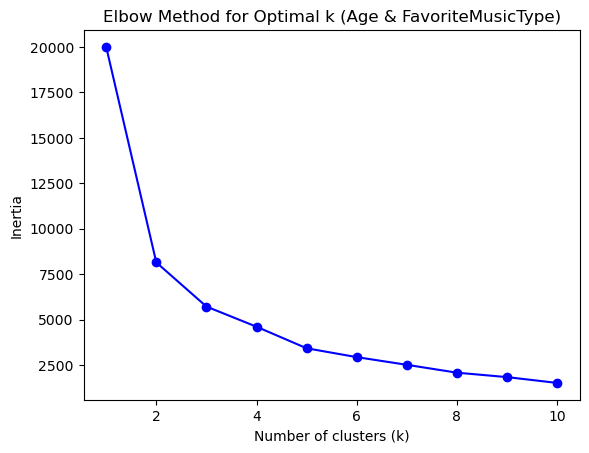

In [89]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# 选特征
features = df[['Age', 'FavoriteMusicType']]

# 标准化
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# 肘部法找最佳 K
inertia = []
k_range = range(1, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_features)
    inertia.append(kmeans.inertia_)

plt.plot(k_range, inertia, 'bo-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k (Age & FavoriteMusicType)')
plt.show()


In [90]:
# 假设 k=3
kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(scaled_features)

# 查看每个群体人数
print(df['Cluster'].value_counts())


Cluster
0    4675
1    2878
2    2447
Name: count, dtype: int64


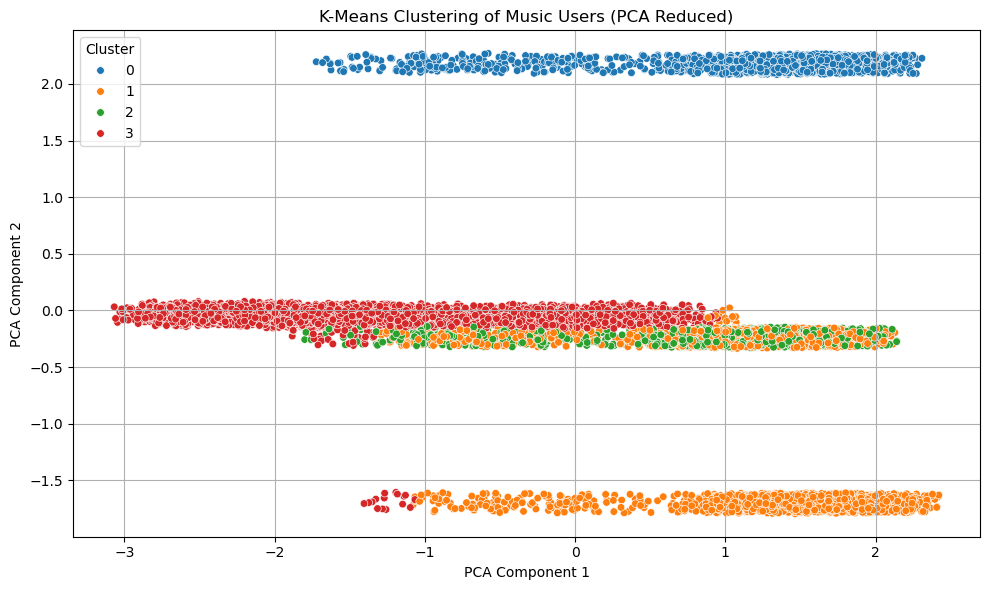

In [116]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans


# 2. Select features for clustering
num_features = ['Age', 'WeeklyListeningHours', 'NumberOfPlaylists']
cat_features = ['FavoriteMusicType']

# 4. Combine all features
features = pd.concat([df[num_features].reset_index(drop=True), cat_encoded_df.reset_index(drop=True)], axis=1)

# 5. Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(features)

# 6. Apply KMeans clustering
k = 4
kmeans = KMeans(n_clusters=k, random_state=42)
df['cluster'] = kmeans.fit_predict(X_scaled)

# 7. Reduce dimensions using PCA for visualization
pca = PCA(n_components=2)
components = pca.fit_transform(X_scaled)
df['pca1'] = components[:, 0]
df['pca2'] = components[:, 1]

# 8. Plotting the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='pca1', y='pca2', hue='cluster', palette='tab10', s=30)
plt.title('K-Means Clustering of Music Users (PCA Reduced)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title='Cluster')
plt.grid(True)
plt.tight_layout()
plt.show()


In [99]:
recommend_from_cluster(122)


NameError: name 'recommend_from_cluster' is not defined

C:\TAR UMT\Degree\Y2S2\AI\PRACTICAL\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


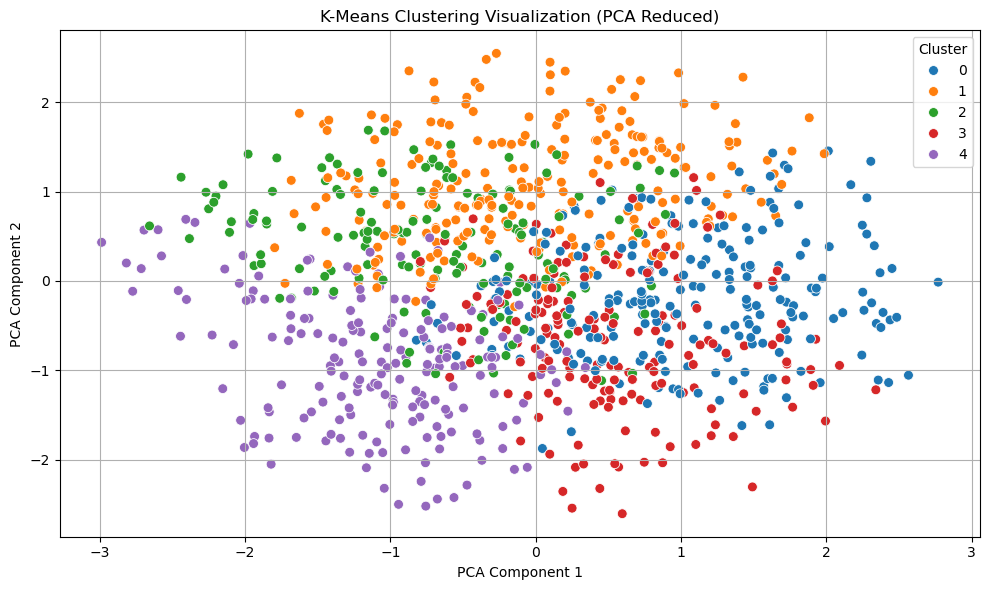

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

# Load a simulated subset to demonstrate visualization (since we don't have the full dataset)
# We'll simulate the structure based on what user described earlier

# Simulate dataset structure
import numpy as np

np.random.seed(42)
n_samples = 1000
df_sim = pd.DataFrame({
    'stars': np.random.uniform(1, 5, n_samples),
    'reviews': np.random.randint(0, 1000, n_samples),
    'price': np.random.uniform(5, 200, n_samples),
    'categoryEncoded': np.random.randint(0, 10, n_samples),
    'isBestSeller': np.random.choice([0, 1], n_samples)
})

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_sim)

# Apply KMeans clustering
kmeans = KMeans(n_clusters=5, random_state=42)
df_sim['cluster'] = kmeans.fit_predict(X_scaled)

# Reduce dimensions using PCA for visualization
pca = PCA(n_components=2)
components = pca.fit_transform(X_scaled)
df_sim['pca1'] = components[:, 0]
df_sim['pca2'] = components[:, 1]

# Plotting the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_sim, x='pca1', y='pca2', hue='cluster', palette='tab10', s=50)
plt.title('K-Means Clustering Visualization (PCA Reduced)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title='Cluster')
plt.grid(True)
plt.tight_layout()
plt.show()


## MeanShift

## DBSCAN

In [ ]:
import numpy as np
import pandas as pd

np.random.seed(42)
n = 10000
music_types = ['Rock', 'Pop', 'J-Pop', 'K-Pop', 'EDM', 'Jazz', 'Chill', 'Oldies', 'Traditional']

# 定义每种音乐类型的主年龄段、听歌时长、歌单数均值
music_type_params = {
    'Rock':         {'age_mu': 25, 'age_sigma': 6, 'hours_mu': 18, 'hours_sigma': 6, 'pl_mu': 40, 'pl_sigma': 20},
    'Pop':          {'age_mu': 23, 'age_sigma': 7, 'hours_mu': 20, 'hours_sigma': 7, 'pl_mu': 45, 'pl_sigma': 22},
    'J-Pop':        {'age_mu': 22, 'age_sigma': 5, 'hours_mu': 22, 'hours_sigma': 6, 'pl_mu': 50, 'pl_sigma': 18},
    'K-Pop':        {'age_mu': 21, 'age_sigma': 5, 'hours_mu': 23, 'hours_sigma': 7, 'pl_mu': 55, 'pl_sigma': 20},
    'EDM':          {'age_mu': 24, 'age_sigma': 6, 'hours_mu': 25, 'hours_sigma': 8, 'pl_mu': 60, 'pl_sigma': 25},
    'Jazz':         {'age_mu': 35, 'age_sigma': 8, 'hours_mu': 15, 'hours_sigma': 5, 'pl_mu': 30, 'pl_sigma': 15},
    'Chill':        {'age_mu': 32, 'age_sigma': 10, 'hours_mu': 17, 'hours_sigma': 6, 'pl_mu': 35, 'pl_sigma': 18},
    'Oldies':       {'age_mu': 40, 'age_sigma': 7, 'hours_mu': 13, 'hours_sigma': 5, 'pl_mu': 25, 'pl_sigma': 12},
    'Traditional':  {'age_mu': 42, 'age_sigma': 6, 'hours_mu': 12, 'hours_sigma': 4, 'pl_mu': 20, 'pl_sigma': 10},
}

# 随机分配音乐类型（可根据实际比例调整）
music_type_choices = np.random.choice(music_types, size=n, p=[0.13,0.13,0.10,0.10,0.10,0.10,0.12,0.12,0.10])

ages = []
hours = []
playlists = []

for mt in music_type_choices:
    p = music_type_params[mt]
    age = np.clip(np.random.normal(p['age_mu'], p['age_sigma']), 18, 45)
    hour = np.clip(np.random.normal(p['hours_mu'], p['hours_sigma']), 5, 30)
    pl = np.clip(np.random.normal(p['pl_mu'], p['pl_sigma']), 0, 100)
    ages.append(int(age))
    hours.append(int(hour))
    playlists.append(int(pl))

df = pd.DataFrame({
    'UserID': np.arange(1, n+1),
    'Gender': np.random.choice(['Male', 'Female'], n),
    'Age': ages,
    'FavoriteMusicType': music_type_choices,
    'WeeklyListeningHours': hours,
    'PaidSubscription': np.random.choice(['Yes', 'No'], n, p=[0.6, 0.4]),
    'ListeningPlatform': np.random.choice(['Spotify', 'Apple Music', 'QQ Music', 'NetEase Cloud', 'YouTube Music'], n),
    'Country': np.random.choice(['China', 'USA', 'Japan', 'Korea', 'UK', 'Germany', 'France', 'Brazil', 'India', 'Australia'], n),
    'SubscriptionType': np.random.choice(['Free', 'Premium', 'Family', 'Student'], n),
    'GenrePreferenceLevel': np.random.choice(['High', 'Medium', 'Low'], n),
    'DeviceType': np.random.choice(['Mobile', 'PC', 'Tablet', 'Smart Speaker'], n),
    'ListeningTimeOfDay': np.random.choice(['Morning', 'Afternoon', 'Evening', 'Night'], n),
    'NumberOfPlaylists': playlists
})

df.to_csv('music_data_10000_modified.csv', index=False)